In [5]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from IPython.display import display


pd.set_option('display.max_columns', None)
custom_palette = sns.color_palette("light:b", as_cmap=True)


# Input data

In [7]:
df = pd.read_pickle("data/altered_data/input_data.pkl")

## Data Overview/Summary Stats

In [8]:
print(f"The input data has consists of {len(df)} rows and has {df.shape[1]} columns")
nulls = pd.DataFrame({
    "columns":df.columns.tolist(), 
    "dtypes":df.dtypes.values, 
    "pct_of_nulls":df.isna().sum().values / len(df)
    }).set_index("columns")
nulls.loc[df.describe().T.index, "mean"] = df.describe().T["mean"]
nulls.loc[df.describe().T.index, "std"] = df.describe().T["std"]
nulls.loc[df.describe().T.index, "min"] = df.describe().T["min"]
nulls.loc[df.describe().T.index, "50%"] = df.describe().T["50%"]
nulls.loc[df.describe().T.index, "max"] = df.describe().T["max"]

categorical_columns = ["icd_code", "gender", "admission_type", ]
for col in categorical_columns:
    display(df[col].value_counts(normalize=True))
display(nulls.fillna("N/A"))

The input data has consists of 76525 rows and has 27 columns


icd_code
Z87891    0.508474
E669      0.176439
N390      0.138438
I110      0.106906
D509      0.069742
Name: proportion, dtype: float64

gender
F    0.507991
M    0.492009
Name: proportion, dtype: float64

admission_type
OBSERVATION ADMIT              0.398353
EW EMER.                       0.190970
SURGICAL SAME DAY ADMISSION    0.096204
EU OBSERVATION                 0.095995
URGENT                         0.090245
DIRECT OBSERVATION             0.066253
DIRECT EMER.                   0.031820
ELECTIVE                       0.024763
AMBULATORY OBSERVATION         0.005397
Name: proportion, dtype: float64

,dtypes,pct_of_nulls,mean,std,min,50%,max
columns,,,,,,,
icd_code,object,0.000000,N/A,N/A,N/A,N/A,N/A
icd_version,int64,0.000000,10.0,0.0,10.0,10.0,10.0
long_title,object,0.000000,N/A,N/A,N/A,N/A,N/A
chapter,object,0.000000,N/A,N/A,N/A,N/A,N/A
block,object,0.000000,N/A,N/A,N/A,N/A,N/A
subject_id,object,0.000000,N/A,N/A,N/A,N/A,N/A
hadm_id,object,0.000000,N/A,N/A,N/A,N/A,N/A
seq_num,int64,0.000000,10.892323,6.811723,1.0,10.0,39.0
gender,object,0.000000,N/A,N/A,N/A,N/A,N/A


## Distributions

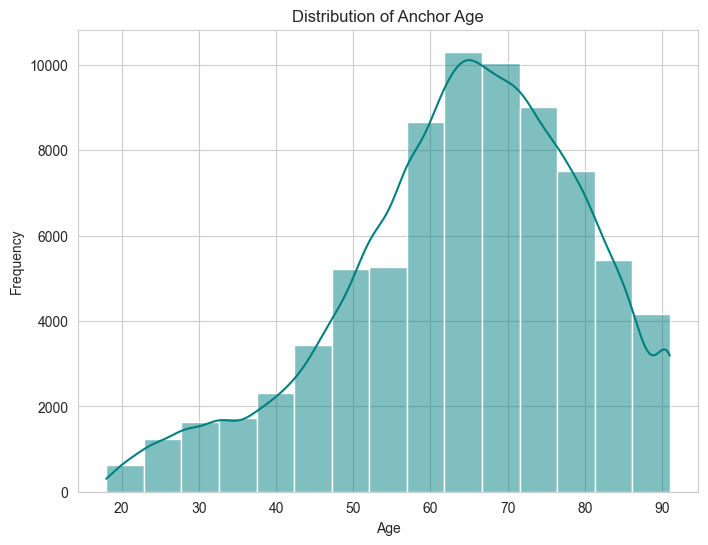

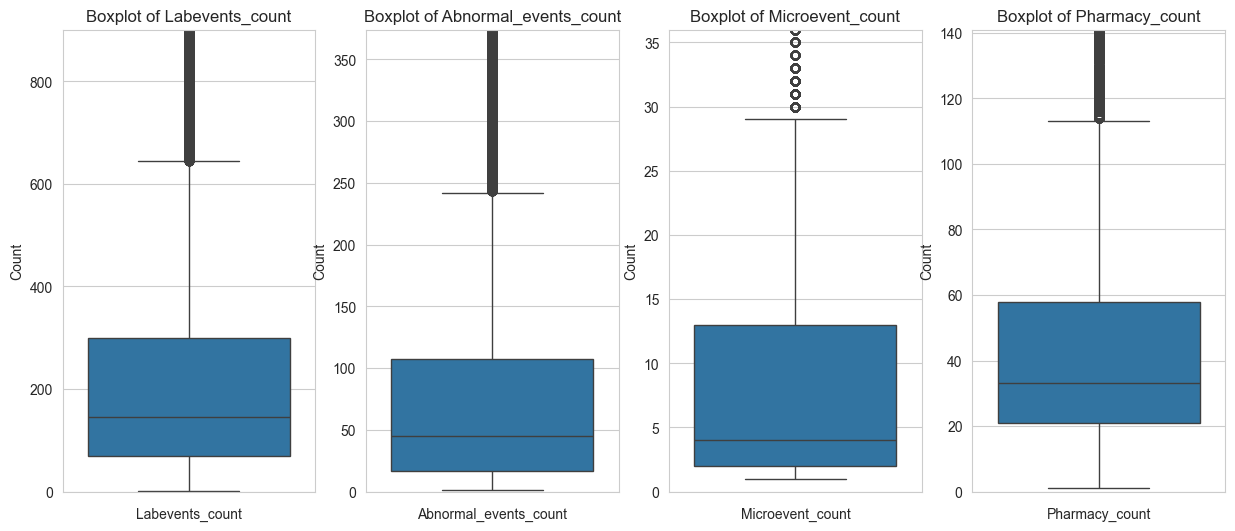

In [9]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df["anchor_age"], bins=15, kde=True, color='teal')
ax.set_title('Distribution of Anchor Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

count_cols = [col for col in df.columns if col.endswith("count")]
fig, ax = plt.subplots(1, len(count_cols), figsize=(15,6))
for i, col in enumerate(count_cols):
    sns.boxplot(df[col], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col.capitalize()}')  # Capitalize column name for title
    ax[i].set_ylim(0, df[col].quantile(0.95))  # Zoom in to the 95th percentile
    ax[i].set_xlabel(col.capitalize())  # X-axis label
    ax[i].set_ylabel('Count')  # Y-axis label
plt.show()

## Correlations

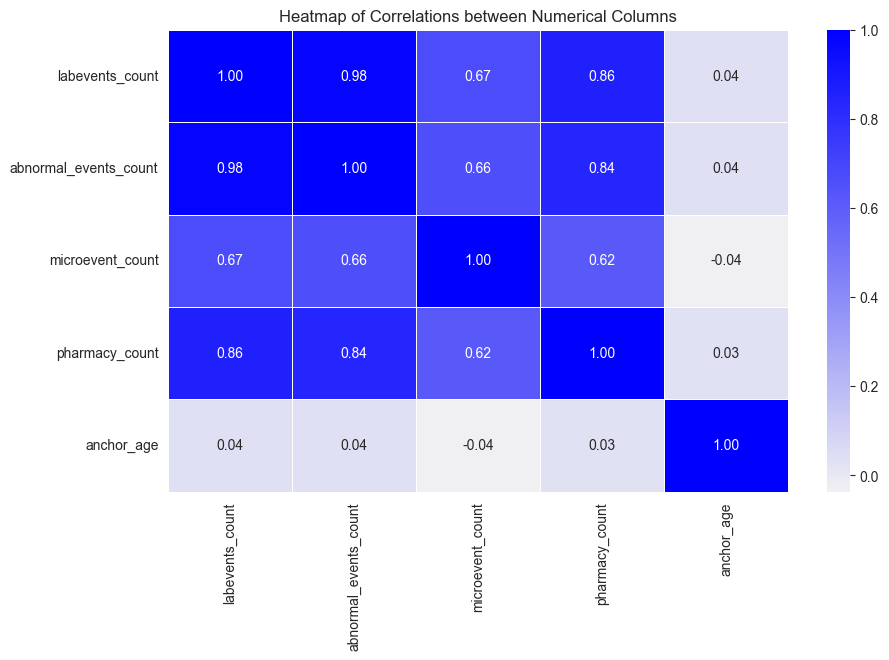

In [10]:
count_cols = [col for col in df.columns if col.endswith("count")]
count_cols.append("anchor_age")
corr_matrix = df[count_cols].corr()
plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap=custom_palette, linewidths=0.5, fmt='.2f')
plt.title('Heatmap of Correlations between Numerical Columns')
plt.show()

## Handling Missing Data

<Figure size 1000x600 with 0 Axes>

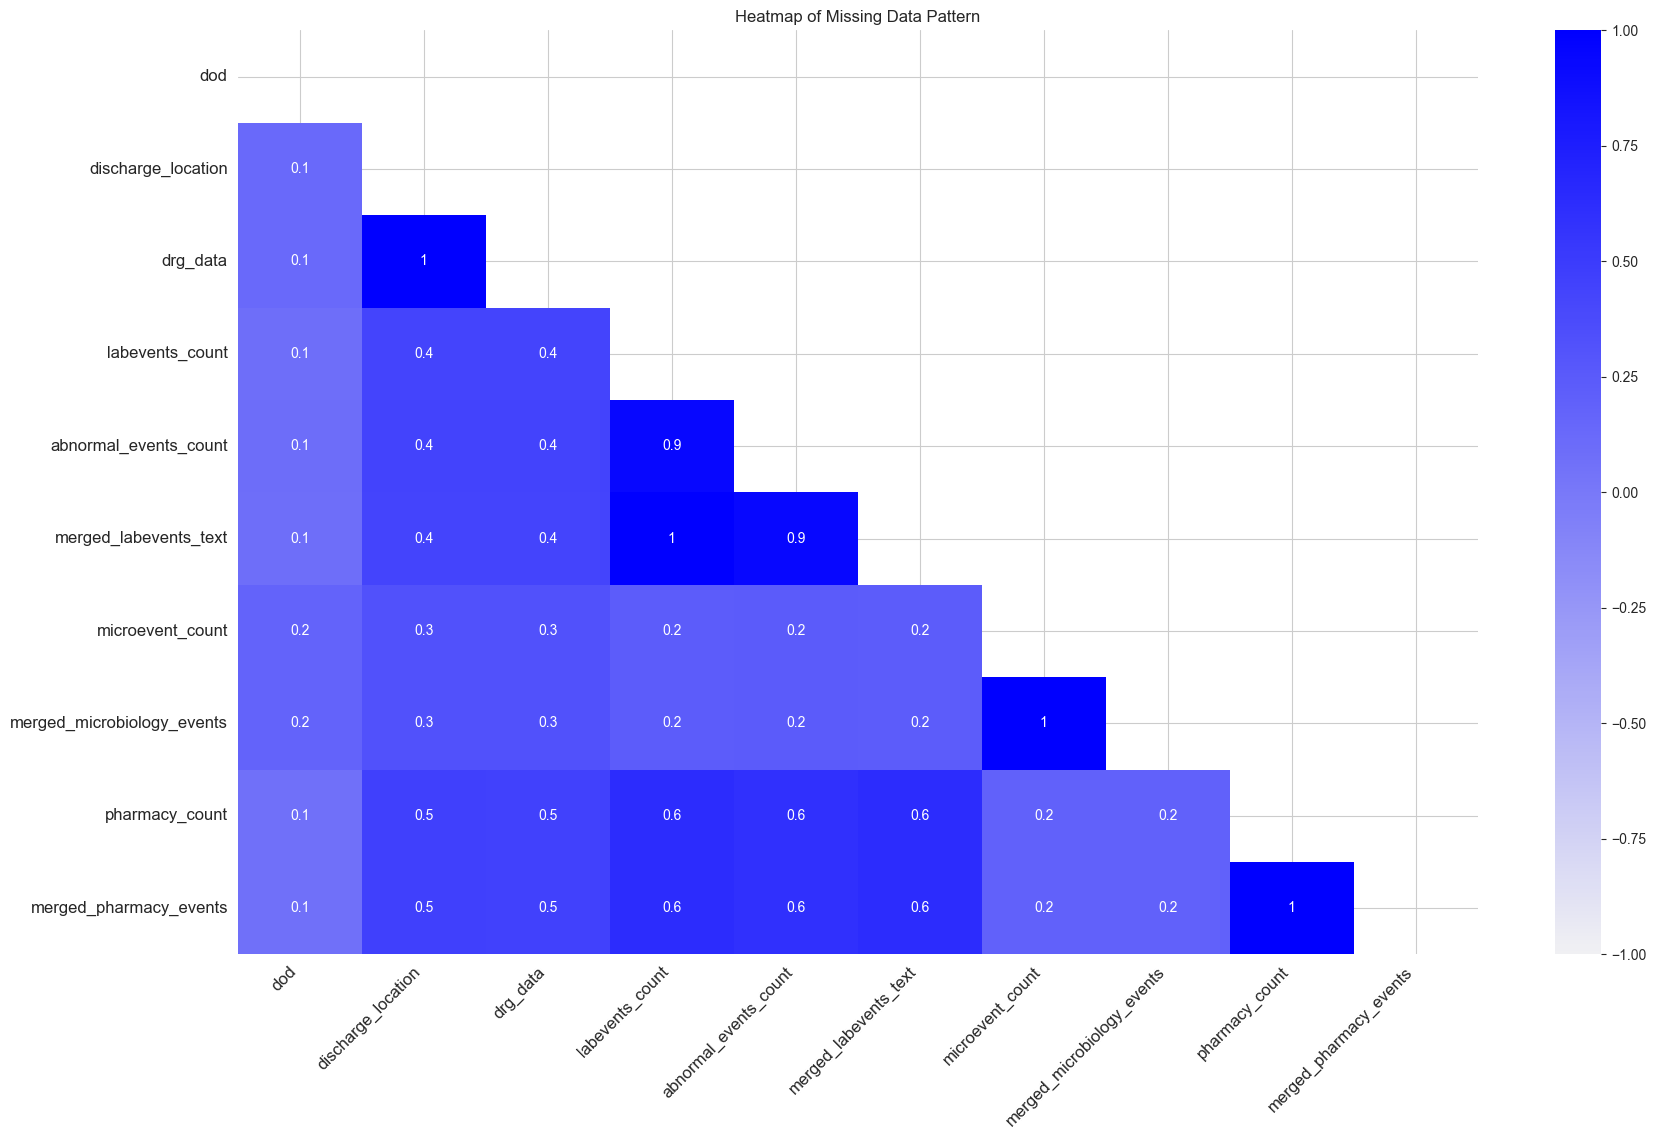

In [11]:
plt.figure(figsize=(10, 6))
msno.heatmap(df.drop([ "admit_provider_id", "medication"], axis=1), cmap=custom_palette, fontsize=12)

plt.title('Heatmap of Missing Data Pattern')
plt.show()

## Textual features

In [12]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wail.baalawi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
def flatten_text(text):
    if text is None:
        return ''
    if isinstance(text, list):
        # Recursively flatten nested lists
        return ' '.join(flatten_text(item) if isinstance(item, list) else str(item) for item in text)
    return str(text)

C:\Users\wail.baalawi\AppData\Local\Temp\ipykernel_30984\1305732703.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_text = df[text_columns].applymap(flatten_text).apply(lambda x: ' '.join(x), axis=1).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


Most common words: [('comment', 16477323), ('Administered', 9794049), ('Sodium', 2356199), ('Chloride', 1955378), ('0.9%', 1674983), ('Flush', 1666260), ('Flushed', 1619998), ('patient', 1446331), ('via', 1445828), ('Given', 1399862)]


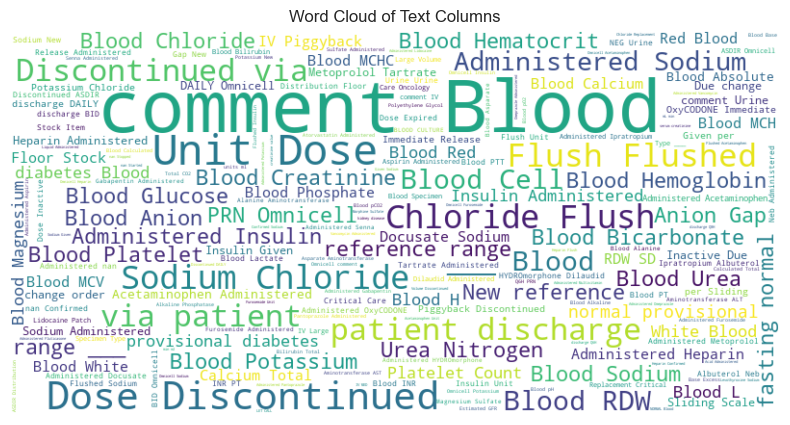

In [14]:
text_columns = ['merged_labevents_text', 'medication', 'merged_microbiology_events', 'merged_pharmacy_events', 'drg_data']
stop_words = set(stopwords.words('english'))
df_text = df[text_columns].applymap(flatten_text).apply(lambda x: ' '.join(x), axis=1).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
all_text = ' '.join(df_text)

# Word Count (Term Frequency)
word_count = Counter(all_text.split())
most_common_words = word_count.most_common(10)
print("Most common words:", most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Columns')
plt.show()

# Prepared data

In [6]:
prep_df = pd.read_pickle("data/altered_data/prepared_data.pkl")

In [16]:
print(prep_df.shape)
prep_df.head(2)

(12500, 14)


,,is_male,anchor_age,anchor_year,labevents_count,abnormal_events_count,microevent_count,pharmacy_count,admission_details,drg_details,medication_details,labevents_details,microbiology_details,pharmacy_details,icd_code_encoded
subject_id,hadm_id,,,,,,,,,,,,,,
14613895.0,22838639.0,0.0,28.0,2124.0,0.0,0.0,0.0,20.0,Patient has been admitted as SURGICAL SAME DAY...,Diagnoses Related Groups::: The patient has a ...,The patient is prescribed with the following m...,The following were commented on the patients l...,The following comments on the microbiology tes...,The patient has been prescribed the following ...,0
14797590.0,23577202.0,1.0,70.0,2147.0,354.0,123.0,21.0,74.0,Patient has been admitted as OBSERVATION ADMIT...,Diagnoses Related Groups::: The patient has a ...,The patient is prescribed with the following m...,The following were commented on the patients l...,The following comments on the microbiology tes...,The patient has been prescribed the following ...,0
